In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['font.serif'] = []
#plt.rcParams['text.usetex'] = True
#plt.rcParams['figure.figsize'] = 3.5, 2.625
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['errorbar.capsize'] = 2
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16 
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12
plt.rcParams['legend.fontsize'] = 12
#plt.rcParams['legend.frameon'] = True

In [30]:
directory = "/hpcwork/zu992399/bumphunt_paper/DE/scan_without_2_15_256/window5/"
inner_data = np.load(directory+"data/innerdata.npy")
samples = np.load(directory+"samples_inner_new.npy")[:len(inner_data)]
samples_mine = np.load(directory+"samples_reweighted.npy")[:len(inner_data)]
samples_Manuel = np.load(directory+"samples_inner_resampled.npy")[:len(inner_data)]

labels= [r"$m_{J1}$/TeV", r"$\Delta m_J$/TeV", r"$\tau_{21,J1}$", r"$\tau_{21,J2}$"]

In [38]:
def plot(x1, x2):
    fig, ax = plt.subplots(2,2, figsize=(10,9))
    ax = ax.flatten()
    #legend = [None, ("samples", "bkg (inner)", "bkg (outer)", "unweighted", "weights"), None, None]
    n1 = np.zeros((4, 100))
    n2 = np.zeros((4, 100))
    for i in range(4):
        n1[i], bins, _ = ax[i].hist(x1[:,i], bins=100, histtype="step", linewidth=2)
        n2[i], bins, _ = ax[i].hist(x2[:,i], bins=bins, histtype="step", linewidth=2)
        ax[i].set_xlabel(labels[i])
        ax[i].set_ylabel("a.u.")
    fig.tight_layout()
    plt.show()

    fig, ax = plt.subplots(2,2, figsize=(10,9))
    ax = ax.flatten()
    #legend = [None, ("samples", "bkg (inner)", "bkg (outer)", "unweighted", "weights"), None, None]
    for i in range(4):
        ax[i].hist(bins[1:],weights=(n1[i]-n2[i])/np.sqrt(n1[i]), bins=bins, histtype="step", linewidth=2)
        ax[i].set_xlabel(labels[i])
        ax[i].set_ylabel("difference")
        ax[i].set_ylim(-3,3)
        ax[i].axhline(2, color="black", linestyle="dashed")
        ax[i].axhline(-2, color="black", linestyle="dashed")
    fig.tight_layout()
    plt.show()

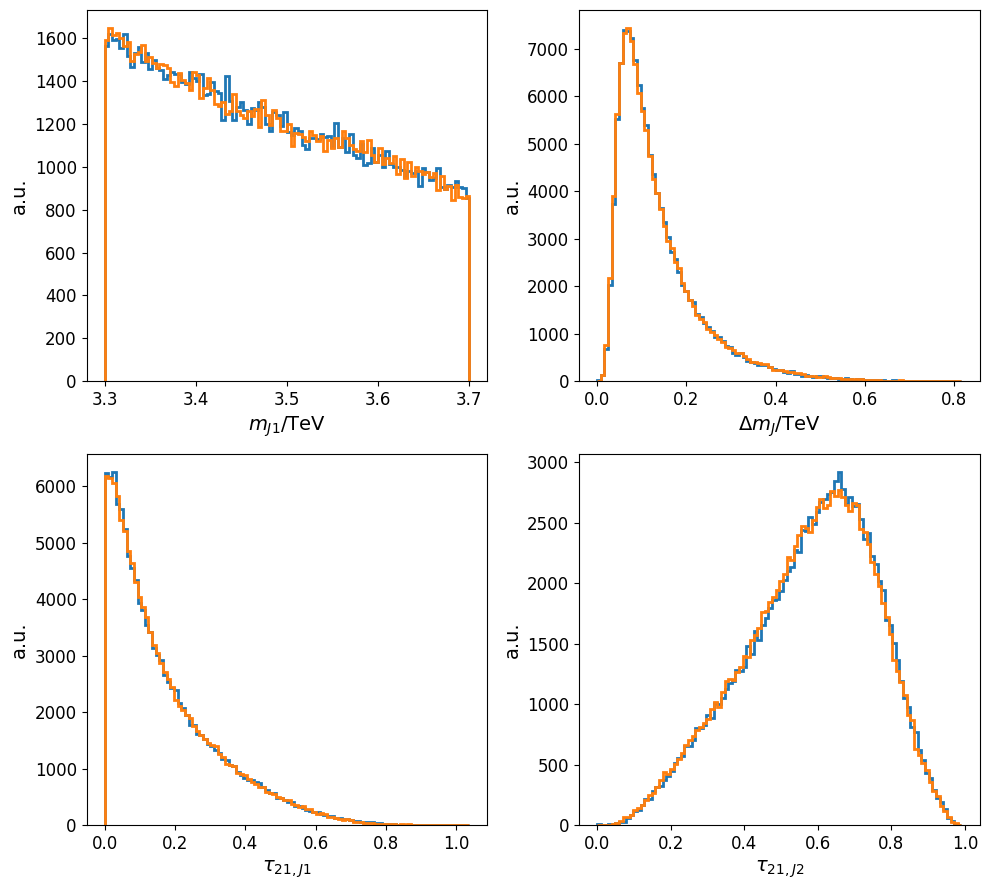

/tmp/zu992399/login18-3_228810/ipykernel_89286/1148088326.py:19: RuntimeWarning: divide by zero encountered in true_divide
  ax[i].hist(bins[1:],weights=(n1[i]-n2[i])/np.sqrt(n1[i]), bins=bins, histtype="step", linewidth=2)
/tmp/zu992399/login18-3_228810/ipykernel_89286/1148088326.py:19: RuntimeWarning: invalid value encountered in true_divide
  ax[i].hist(bins[1:],weights=(n1[i]-n2[i])/np.sqrt(n1[i]), bins=bins, histtype="step", linewidth=2)


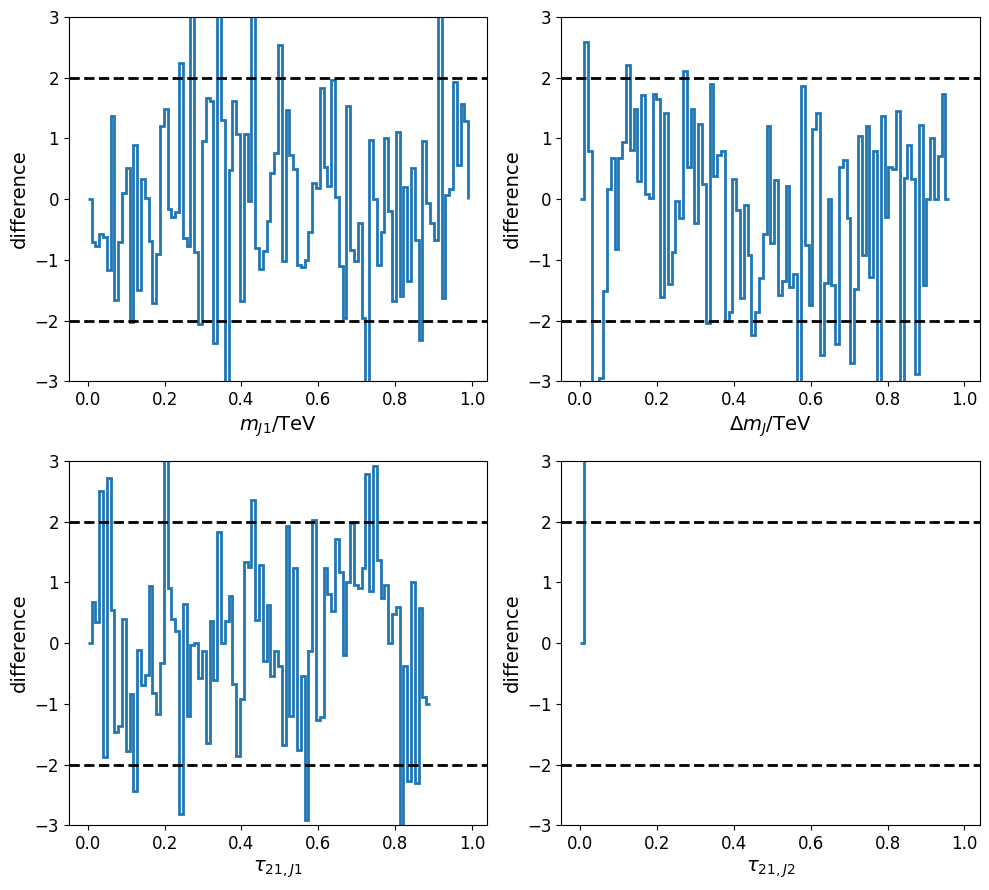

In [39]:
plot(inner_data, samples)

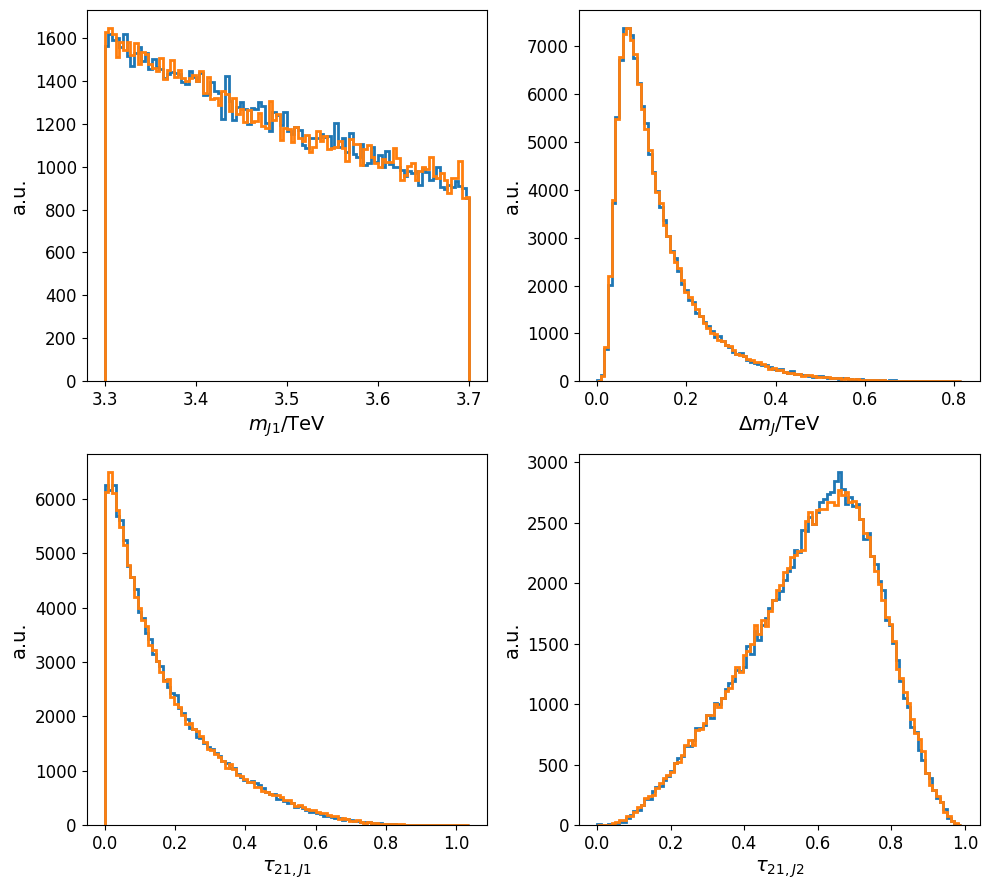

/tmp/zu992399/login18-3_228810/ipykernel_89286/1148088326.py:19: RuntimeWarning: divide by zero encountered in true_divide
  ax[i].hist(bins[1:],weights=(n1[i]-n2[i])/np.sqrt(n1[i]), bins=bins, histtype="step", linewidth=2)
/tmp/zu992399/login18-3_228810/ipykernel_89286/1148088326.py:19: RuntimeWarning: invalid value encountered in true_divide
  ax[i].hist(bins[1:],weights=(n1[i]-n2[i])/np.sqrt(n1[i]), bins=bins, histtype="step", linewidth=2)


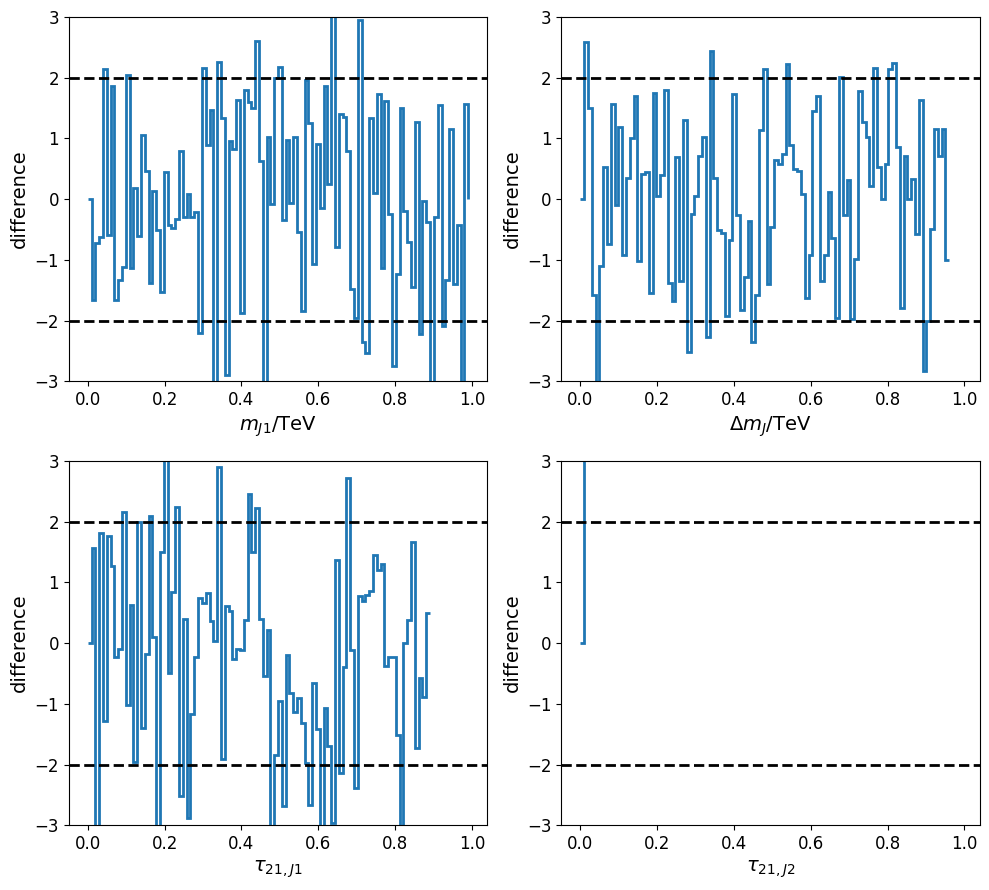

In [40]:
plot(inner_data, samples_Manuel)